In [14]:
from igraph import Graph
from igraph import plot
from IPython import display
import matplotlib.pyplot as plt

Leemos el grafo y lo imprimimos

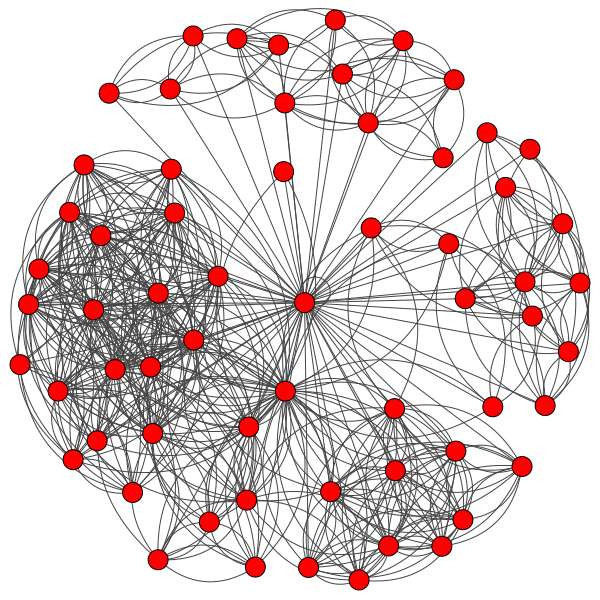

In [15]:
g = Graph(directed=False)
g = g.Load('edges.txt', format='edgelist', directed=False)
r = plot(g, layout = g.layout_kamada_kawai(),target="caimlab-graph.png")
display.Image(filename="caimlab-graph.png")

In [16]:
#Calculamos los primeros datos básicos de la red.
print('La red tiene {0} nodos'.format(g.vcount()))
print('La red tiene {0} aristas'.format(g.ecount()))
print('La red tiene  un diametro de {0}.'.format(g.diameter()))
print('El clustering coefficient del grafo es de {0:.2f}'.format(g.transitivity_undirected()))

La red tiene 62 nodos
La red tiene 602 aristas
La red tiene  un diametro de 2.
El clustering coefficient del grafo es de 0.52


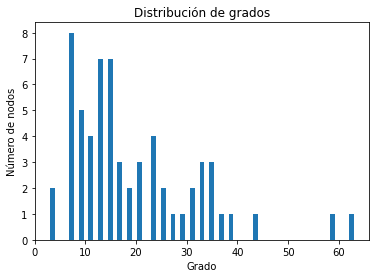

In [17]:
#Printeamos la Degree distribution
plt.title('Distribución de grados')
plt.xlabel('Grado')
plt.ylabel('Número de nodos')
r = plt.hist(g.degree(), bins=max(g.degree()))

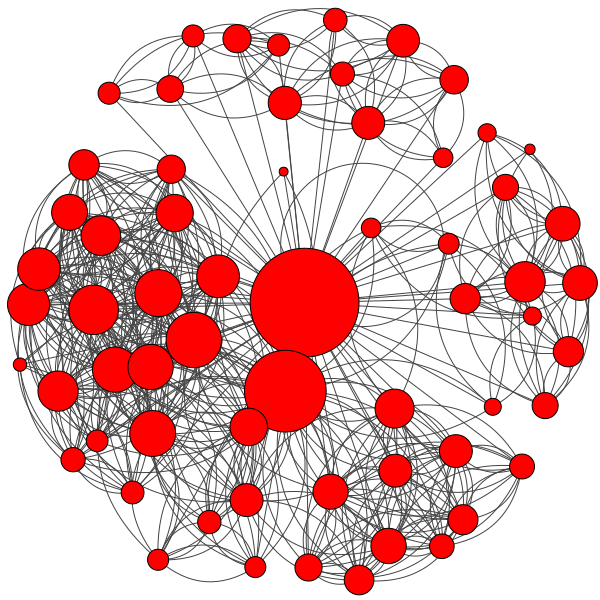

In [18]:
#caluclamos el pageRank

pg = g.pagerank()
pg = [x*2000 for x in pg]
ppg = plot(g, layout=g.layout_kamada_kawai(), target='pageRank.png', vertex_size=pg)
display.Image(filename='pageRank.png')

Clusters: 7


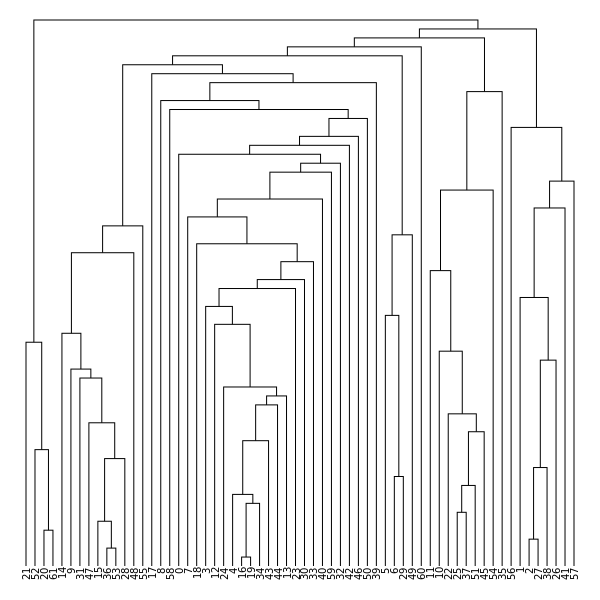

In [20]:
#Caluclamos la comunity
com = g.community_edge_betweenness()
r = plot(com,target="community.png", orientation='bottom-top')
print ('Clusters:', com.optimal_count) # Optimal number of clusters from the dendrogram
display.Image(filename="community.png")


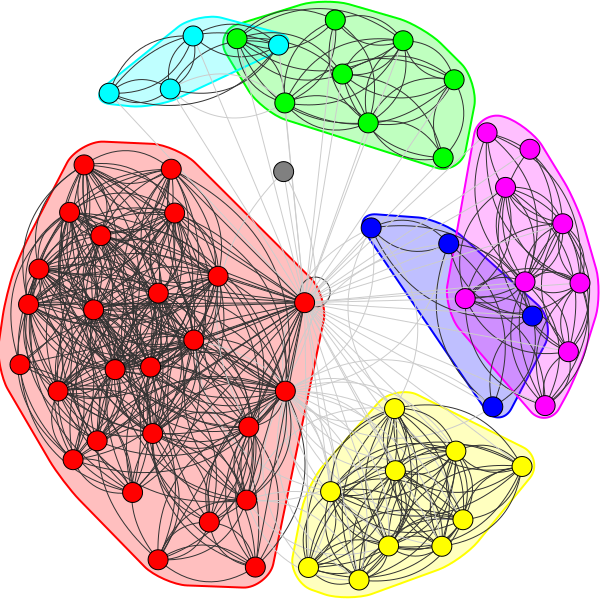

In [21]:
#grupo con más nodos
grupos = r = plot(com.as_clustering(), layout = g.layout_kamada_kawai(),target="com-erdos.png",mark_groups=True)
display.Image(filename="com-erdos.png")

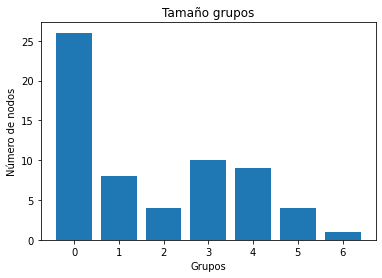

In [22]:
#Miramos el histograma de los grupos y el grupo con más nodos
grupos = com.as_clustering()
Max = max(len(minigrupo) for minigrupo in grupos)

plt.title('Tamaño grupos')
plt.xlabel('Grupos')
plt.ylabel('Número de nodos')
r = plt.bar(range(len(grupos)), [len(i) for i in grupos], align='center')